### Student Details

Student name: AKHIL RAGHU NATH

Student ID:23048417

In [160]:
# import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Task 1: Implement Logistic Regression

### Adaline class
From https://sebastianraschka.com/Articles/2015_singlelayer_neurons.html

In [161]:
class AdalineGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return self.net_input(X)

    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

## Logistic regression
Adapt the Adaline class to use logistic regression. Recall, the `activation` function for logistic regression is the sigmoid function:

\begin{equation}
g\left(z\right) = \text{logit}^{-1}(z) = \frac{1}{1 + e^{-z}}
\end{equation}

where

\begin{equation}
z = \textbf{w} \cdot \textbf{x} = w_0 + w_1x_1 + w_2x_2 + \ldots + w_nx_n
\end{equation}

$z$ is given by the function `net_input` in the class.  Note: In Andrew Ng's videos, recall, he uses $\theta_i$ for the weights instead of $w_i$. And in some other videos, you may be see $\alpha$ used instead of $z$. This type of notation is not standardised, and the lack of standardised notation is something you will need to get used to in general.

The cost function is also updated to match the activation function:

\begin{equation}
\text{J}\left(\textbf{w}\right) = -\sum_i y^{(i)} \log\left(g(z^{(i)})\right) +
                                   \left(1 - y^{(i)}\right) \log\left(1 - g(z^{(i)}\right))
\end{equation}

where $g\left(z\right)$ is the `output` after the `net_input` and `activation` functions are called.

Then
1. Read the Iris-setosa and Iris-versicolor, sepal length and petal length
2. Train the algorithm
3. Plot the Logistic cost per epoch of training
4. Plot the decision boundary using the supplied plot_decision_boundary function

HINTS:
1. In the `AdalineGD` class, the `activation` function was not used in training, as it was the same as the `net_input` function. Now, they are different, and the `activation` function has to be called on the output of the `net_input` function during training.
2. The `predict` function needs to call the `net_input` function and the `activation` function in sequence.
3. The sigmoid function maps the full range of real numbers to the range 0 to 1. So the threshold in the predict function needs to be adapted. The output classes should also be changed to 0 and 1 instead of -1 and +1.
4. Use the `np.clip` function to clip the inputs to the `activation` function. E.g. clip $z$ to between -250 and +250. This stops very large numbers being input to the exponentiation function, which could lead to numerical instability.
5. Don't forget to rename the class, as we're now dealing with Logistic Regression rather than Adaline.

### Logistic Regression Class

<span style="color:red">Insert your code below</span>.

In [162]:
################################
# Class stub for you to fill the rest of the code

class LogisticRegressionGD(object):
    def __init__(self, eta=0.01, epochs=50):
        self.eta = eta
        self.epochs = epochs

    def train(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []

        for i in range(self.epochs):
            output = self.activation(self.net_input(X))
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            # cost function updated
            cost=-np.sum(np.dot(y,np.log(output))+np.dot((1-y),np.log(1-output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        #clip functon used to clip the input
        clip_z=np.clip(z,-250,250)
        return  1.0 / (1.0 + np.exp(-(clip_z)))

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5,1, 0)

In [163]:
def plot_decision_boundary(X, y, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

In [164]:
# Read the data from the .csv, using the first row as the headers of the data
data = pd.read_csv('/content/iris_data (2).csv',header=0)

# Showing the first few samples so we know it's read correctly
print(data.head(n=300))

     sepal_length   sepa_width   petal_length   petal_width           class
0             5.1          3.5            1.4           0.2     Iris-setosa
1             4.9          3.0            1.4           0.2     Iris-setosa
2             4.7          3.2            1.3           0.2     Iris-setosa
3             4.6          3.1            1.5           0.2     Iris-setosa
4             5.0          3.6            1.4           0.2     Iris-setosa
..            ...          ...            ...           ...             ...
145           6.7          3.0            5.2           2.3  Iris-virginica
146           6.3          2.5            5.0           1.9  Iris-virginica
147           6.5          3.0            5.2           2.0  Iris-virginica
148           6.2          3.4            5.4           2.3  Iris-virginica
149           5.9          3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


In [165]:
# setosa and versicolor
y = data.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 1, 0)

# sepal length and petal length
X = data.iloc[0:100, [0,2]].values

In [166]:
from sklearn.model_selection import train_test_split
# Using  the scikit-learn train_test_split function to split into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Training the algorithm
L_R = LogisticRegressionGD()
L_R.train(X_train, y_train)
y_pred = L_R.predict(X_test)

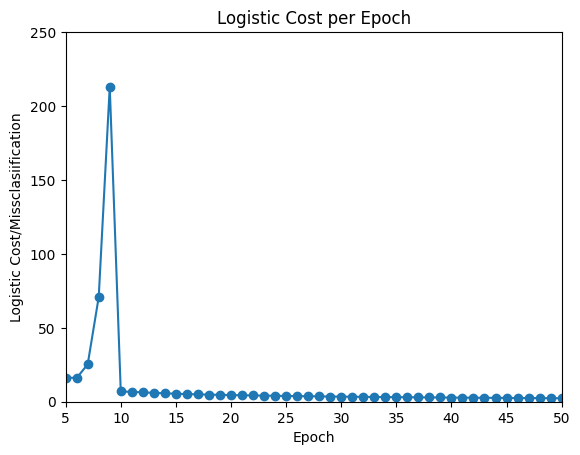

In [167]:
#Plotting the logic cost per epoch

plt.plot(range(1,len(L_R.cost_)+1), L_R.cost_,marker='o')
plt.xlabel('Epoch')
plt.ylabel('Logistic Cost/Missclasiification')
plt.title('Logistic Cost per Epoch')
plt.xlim(5, 50)
plt.ylim(0, 250)
plt.show()


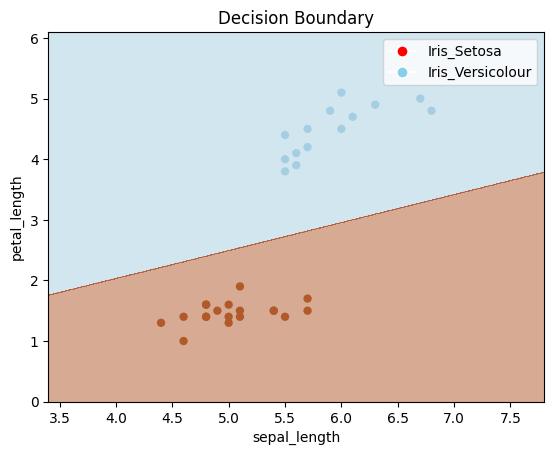

In [168]:
#Using the plot_decision_boundary plotting the decision boundary
plot_decision_boundary(X_test,y_pred,L_R)
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Decision Boundary')
# Add a legend  with specified colors (showing in the plot)and labels
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label='Iris_Setosa', markerfacecolor='red', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Iris_Versicolour', markerfacecolor='skyblue', markersize=8)]

# plotting the legend and map
plt.legend(handles=legend_labels, loc='upper right')
plt.show()




# Task 2: Multi-class Logistic Regression with scikit-learn

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Plot the scaled data
4. Train an instance of the scikitlearn LogisticRegression algorithm on the provided data
    1. You can use all the default parameters
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

Scikit-learn's LogisticRegression class has a parameter to control the regularisation. This parameter is C is the inverse of $\lambda$, which is described in the SVM videos. Note that the step above where the data is normalised is hugely important, as regularisation only works properly when data is normalised.
1. Plot the decision boundary above when you set C to smaller and larger values (even 0.01 and 100)
2. Describe what you observe with reference to what you know about regularisation from the material provided

<span style="color:red">Insert your code below</span>.

In [169]:
from sklearn.preprocessing import LabelEncoder
y=data.iloc[:,4].values
# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on your target labels and transform them
y = label_encoder.fit_transform(y)
X=data.iloc[:,[2,3]].values

#splitting the data and putting strtify as y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

In [170]:
from sklearn.preprocessing import StandardScaler
# create a StandardScaler instance
scaler = StandardScaler()

# Applying scaling to training data
X_train_scaled = scaler.fit_transform(X_train)
# Applying scaling to test data
X_test_scaled = scaler.transform(X_test)
print(y_train)

[1 1 0 2 1 2 0 0 0 2 2 0 0 1 1 2 0 0 2 1 0 2 2 2 1 0 0 0 1 1 0 0 1 1 0 0 1
 2 2 0 2 0 2 0 2 1 0 2 1 2 1 0 1 2 1 2 0 1 0 1 1 1 2 1 1 2 2 0 2 1 1 2 0 2
 2 1 0 2 2 0 0 2 2 2 0 2 1 2 2 0 1 1 1 1 1 0 2 1 2 0 0 1 0 1 0]


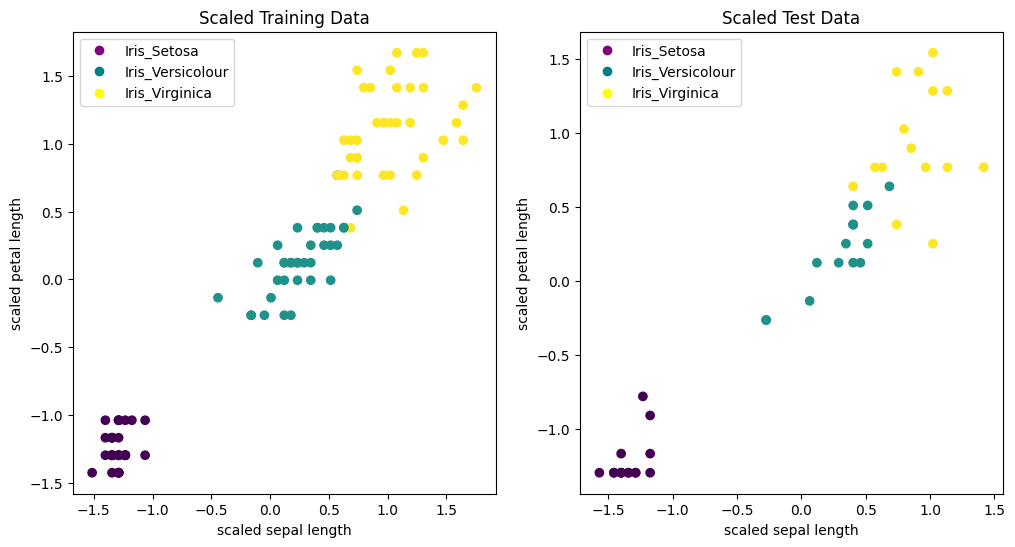

In [171]:
# Plot the scaled training data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train)
plt.title('Scaled Training Data')
# Add a legend  with specified colors and labels
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label='Iris_Setosa', markerfacecolor='purple', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Iris_Versicolour', markerfacecolor='teal', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Iris_Virginica', markerfacecolor='yellow', markersize=8)]

# Create the legend using the custom legend_labels
plt.legend(handles=legend_labels, loc='upper left')
plt.xlabel('scaled sepal length')
plt.ylabel('scaled petal length')

# Plot the scaled test data
plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1,], c=y_test)
# Add a legend  with specified colors and labels
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label='Iris_Setosa', markerfacecolor='purple', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Iris_Versicolour', markerfacecolor='teal', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Iris_Virginica', markerfacecolor='yellow', markersize=8)]

# plotting the legend and map
plt.legend(handles=legend_labels, loc='upper left')
plt.title('Scaled Test Data')
plt.xlabel('scaled sepal length')
plt.ylabel('scaled petal length')

plt.show()

In [172]:
from sklearn.linear_model import LogisticRegression
#trainin the function
L_R = LogisticRegression()
L_R.fit(X_train_scaled, y_train)

LogisticRegression()

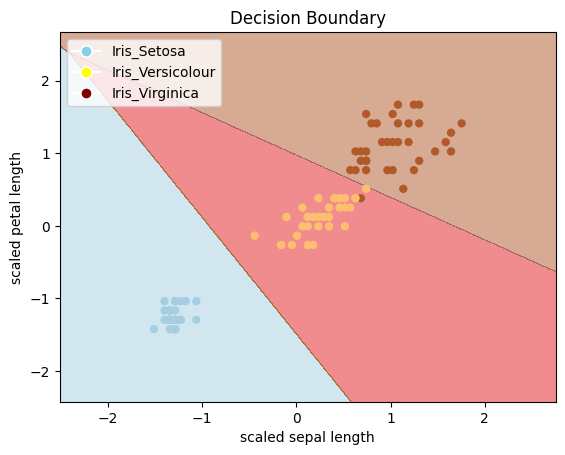

In [173]:
#plotting using the function plot_decision_boundary
plot_decision_boundary(X_train_scaled,y_train,L_R)
plt.xlabel('scaled sepal length')
plt.ylabel('scaled petal length')
plt.title('Decision Boundary')
# Add a legend  with specified colors and labels
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label='Iris_Setosa', markerfacecolor='skyblue', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Iris_Versicolour', markerfacecolor='yellow', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Iris_Virginica', markerfacecolor='maroon', markersize=8)]
# plotting the legend and map
plt.legend(handles=legend_labels, loc='upper left')
plt.show()

In [174]:
#calculating the accuracy
from sklearn.metrics import accuracy_score

y_predict=L_R.predict(X_test_scaled)
#print(y_predict)
print("The accuracy score is", accuracy_score(y_predict, y_test))

The accuracy score is 0.9111111111111111


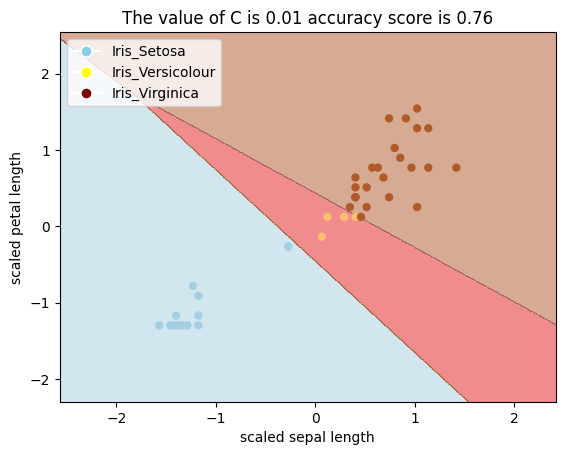

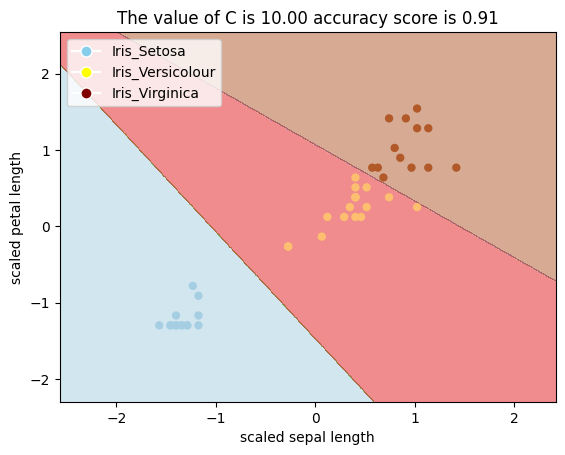

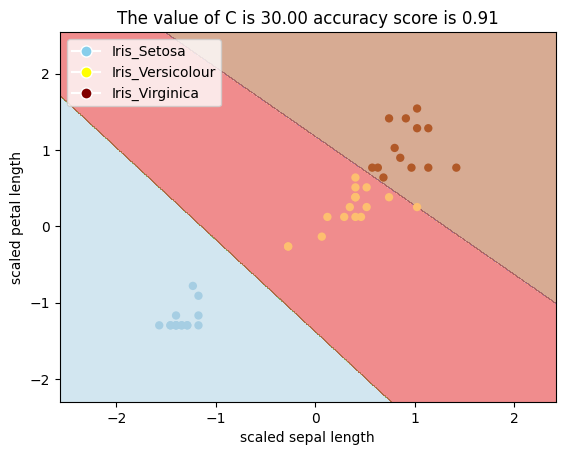

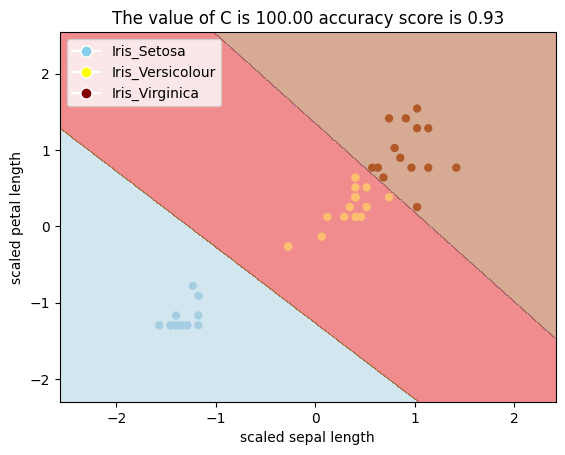

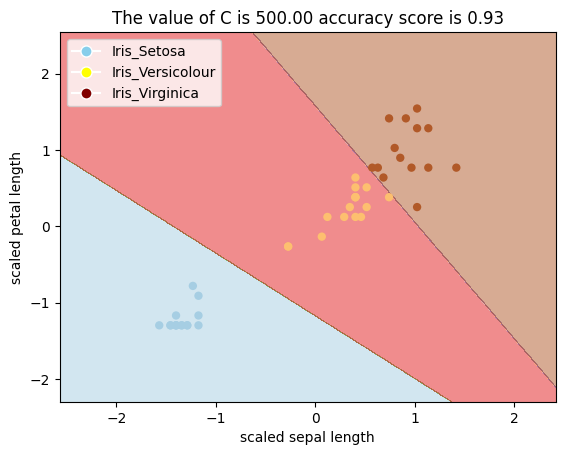

In [175]:
#plotting the function for different values of C
def LogisticRegressionGDC(c):
   L_R = LogisticRegression(C=c)
   L_R.fit(X_train_scaled, y_train)
   y_pred = L_R.predict(X_test_scaled)


   plot_decision_boundary(X_test_scaled, y_pred, L_R)
   # Add a legend  with specified colors and labels
   legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label='Iris_Setosa', markerfacecolor='skyblue', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Iris_Versicolour', markerfacecolor='yellow', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Iris_Virginica', markerfacecolor='maroon', markersize=8)]
   # plotting the legend and map
   plt.legend(handles=legend_labels, loc='upper left')
   accuracy = accuracy_score(y_test, y_pred)
   k=c
   # Create a formatted label
   # Using f-strings for formatting
   label = f"The value of C is {k:.2f} accuracy score is {accuracy:.2f}"
   plt.xlabel('scaled sepal length')
   plt.ylabel('scaled petal length')
   plt.title(label)


#value of C at 0.1
LogisticRegressionGDC(.01)

#value of C at 10
LogisticRegressionGDC(10)

#value of C at 30
LogisticRegressionGDC(30)

#value of C at 100
LogisticRegressionGDC(100)

#value of C at 500
LogisticRegressionGDC(500)

As per the above plots with different c value ,it is observed that if the c value increases the accouracy and the classifier efficiency is increasing and vice versa.here after a value like with c=100 and c=500 accuracy remains same but in decision boundary we can see that model is still trying to classify correctly.

# Task 3: Multi-class Linear SVM

1. Load all of the samples from the Iris dataset, that is iris-setosa, iris-versicolor and iris-virginica. Load the petal length and petal width as the features. Assign the class labels
    1. Iris-setosa = 0
    2. Iris-versicolor = 1
    3. Iris-virginica = 2
2. Use the scikit-learn train_test_split function to split into 30% test and 70% training data
    1. Set the stratify parameter to y. The stratify option will make sure that you get the same split of data as is in the original dataset. I.e. you will get 33% of each of the Iris types in your training and test data.
3. Use the scikit-learn StandardScaler function to apply standard scaling to both training and test data
    1. Print the scaled data
4. Train an instance of the scikitlearn sklearn.svm SVC (Support Vector Classifier) algorithm on the provided data
    1. You can use all the default parameters, except set the kernel to linear
5. Plot the decision boundary using the supplied plot_decision_boundary function
6. Using sklearn's accuracy_score, calculate the accuracy score on the test data

<span style="color:red">Insert your code below</span>.

In [176]:
from sklearn.preprocessing import LabelEncoder
y=data.iloc[:,4].values
# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on your target labels and transform them
y = label_encoder.fit_transform(y)
X=data.iloc[:,[2,3]].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

In [177]:
from sklearn.preprocessing import StandardScaler
# create a StandardScaler instance
scaler = StandardScaler()

# Applying scaling to training data
X_train_scaled = scaler.fit_transform(X_train)
# Applying scaling to test data
X_test_scaled = scaler.transform(X_test)

#Printing  both data
print("X_test_scaled",X_test_scaled)
print("X_trian_scaled",X_train_scaled)

X_test_scaled [[ 1.41707108  0.76791526]
 [ 0.51529857  0.25187621]
 [ 0.7407417   0.38088597]
 [ 0.51529857  0.50989573]
 [ 0.62802014  0.76791526]
 [ 1.02254561  1.54197385]
 [ 0.1207731   0.12286644]
 [ 0.06441232 -0.13515309]
 [-1.17552487 -1.29624096]
 [ 0.7407417   1.41296408]
 [-1.45732878 -1.29624096]
 [-1.400968   -1.29624096]
 [ 1.13526717  0.76791526]
 [ 0.96618483  0.76791526]
 [-1.34460722 -1.29624096]
 [ 0.90982405  1.41296408]
 [-0.27375237 -0.26416285]
 [-1.28824644 -1.29624096]
 [-1.17552487 -0.90921167]
 [-1.17552487 -1.1672312 ]
 [ 0.28985545  0.12286644]
 [-1.28824644 -1.29624096]
 [ 0.34621623  0.25187621]
 [ 1.13526717  1.28395432]
 [ 0.57165936  0.76791526]
 [ 0.40257701  0.38088597]
 [ 0.40257701  0.38088597]
 [-0.27375237 -0.26416285]
 [ 0.40257701  0.38088597]
 [-1.45732878 -1.29624096]
 [ 1.02254561  0.25187621]
 [ 1.02254561  1.28395432]
 [ 0.40257701  0.50989573]
 [-1.34460722 -1.29624096]
 [ 0.85346326  0.89692503]
 [-1.400968   -1.1672312 ]
 [-1.400968   

In [178]:
#training the data with SVC algorithm with linear kernel
from sklearn.svm import SVC
svc_model = SVC(kernel='linear')
svc_model.fit(X_train_scaled, y_train)
y_pred=svc_model.predict(X_test_scaled)

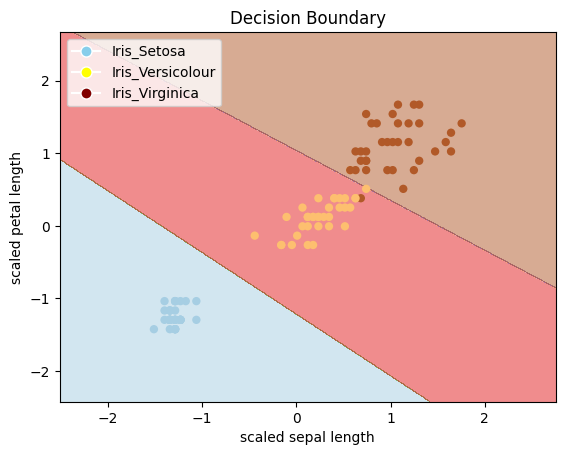

In [179]:
plot_decision_boundary(X_train_scaled ,y_train,svc_model)
plt.xlabel('scaled sepal length')
plt.ylabel('scaled petal length')
plt.title('Decision Boundary')
# Add a legend  with specified colors and labels
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label='Iris_Setosa', markerfacecolor='skyblue', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Iris_Versicolour', markerfacecolor='yellow', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Iris_Virginica', markerfacecolor='maroon', markersize=8)]
# plotting the legend and map
plt.legend(handles=legend_labels, loc='upper left')
plt.show()


In [180]:
#calculating accuracy score
from sklearn.metrics import accuracy_score

#calculating the accuracy
print("The accuracy score is", accuracy_score(y_test, y_pred))

The accuracy score is 0.9111111111111111


# Task 4: Kernel SVM and nonlinear problems

You are provided with a randomised dataset that is clearly not linearly separable, and obviously we could not separate the examples from the two classes very well using any of the linear methods - Perceptron, logistic regression or linear SVM (without kernels).

1. Run an RBF (radial basis function, or Gaussian) kernel SVM model on the data
2. Plot the decision boundaries using the provided function (choose a soft gamma value of 0.1)
3. Change the gamma value to 100. What happens? What is the problem with this result?

Then:
* Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution

Note: the gamma parameter is related to the standard deviation of the Gaussian kernel, i.e. $\gamma = \frac{1}{2\sigma^2}$, or the similarity function

\begin{equation}
\text{similarity}(x, l^{(i)}) = \exp\left(-\gamma||x - l^{(i)}||^2\right) = \exp\left(\frac{||x - l^{(i)}||^2}{2\sigma^2}\right)
\end{equation}

### Provided generated data

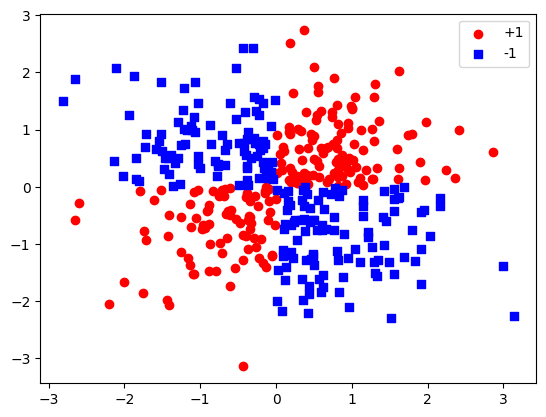

In [181]:
import numpy as np
import matplotlib.pyplot as plt

X_r = np.random.randn(400,2)
y_r = np.where([x[0]*x[1] > 0 for x in X_r], 1, -1)

plt.scatter(X_r[y_r==1, 0],X_r[y_r==1, 1],c='r',marker='o',label='+1')
plt.scatter(X_r[y_r==-1, 0],X_r[y_r==-1, 1],c='b',marker='s',label='-1')
plt.legend()
plt.show()

<span style="color:red">Insert your code below</span>.

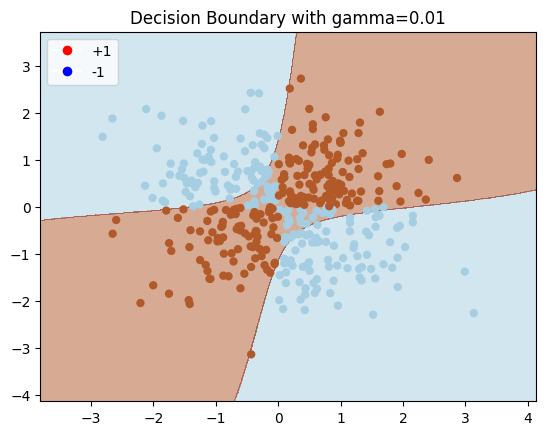

In [182]:
#RBF (radial basis function, or Gaussian) kernel SVM(gamma as 0.1)
Rbf = SVC(kernel='rbf', C=1, gamma=0.1)
Rbf.fit(X_r, y_r)

plot_decision_boundary(X_r, y_r, Rbf)
plt.title('Decision Boundary with gamma=0.01')
# Add a legend  with specified colors and labels
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label='+1', markerfacecolor='red', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='-1', markerfacecolor='blue', markersize=8)]

# plotting the legend and map
plt.legend(handles=legend_labels, loc='upper left')
plt.show()


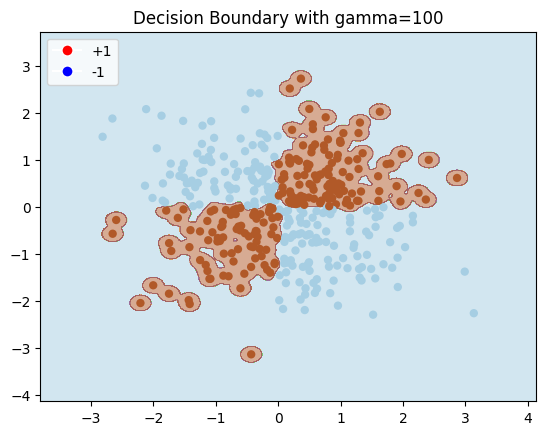

In [183]:
Rbf = SVC(kernel='rbf', C=1, gamma=100)
Rbf.fit(X_r, y_r)

plot_decision_boundary(X_r, y_r, Rbf)
plt.title('Decision Boundary with gamma=100')
# Add a legend  with specified colors and labels
legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label='+1', markerfacecolor='red', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='-1', markerfacecolor='blue', markersize=8)]

# plotting the legend and map
plt.legend(handles=legend_labels, loc='upper left')
plt.show()

If the gamma value is less the the classification is not effective and missclassification is happening (overlapping)and same can be seen in the plot with gamma =.01
But when gamma value increases the classification is happening correctly and precisely as seen in the plot with gamma =100

Repeat for the multi-class Iris data, to provide a multi-class, nonlinear solution

In [184]:
from sklearn.preprocessing import LabelEncoder
y=data.iloc[:,4].values
# Initialize a LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on your target labels and transform them
y = label_encoder.fit_transform(y)
X=data.iloc[:,[2,3]].values

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)
from sklearn.preprocessing import StandardScaler
# create a StandardScaler instance
scaler = StandardScaler()

# Applying scaling to training data
X_train_scaled = scaler.fit_transform(X_train)
# Applying scaling to test data
X_test_scaled = scaler.transform(X_test)

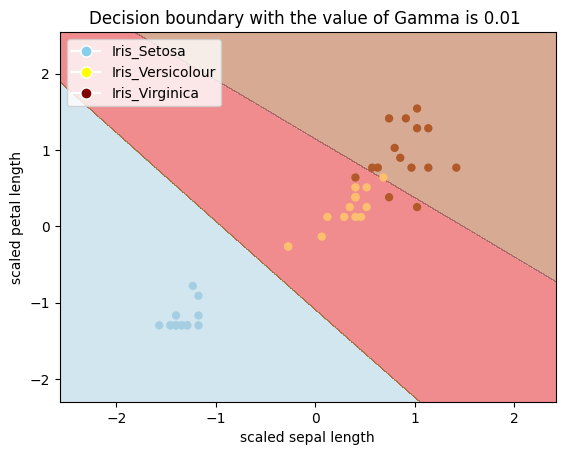

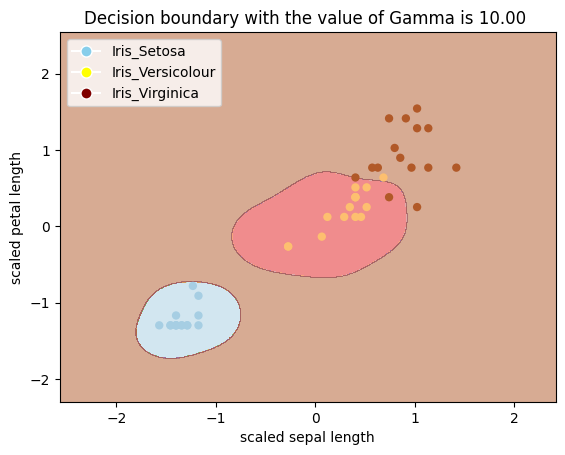

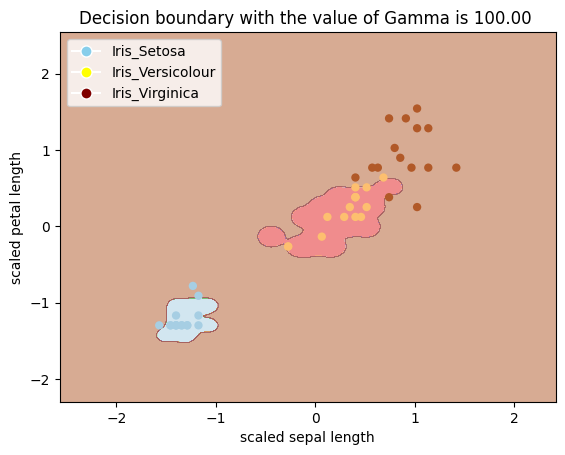

In [186]:
from numpy.random.mtrand import gamma
def Rbf_Svm(g):
   Rbf = SVC(kernel='rbf', gamma=g)
   Rbf.fit(X_train_scaled, y_train)

   plot_decision_boundary(X_test_scaled, y_test, Rbf)
    # Add a legend  with specified colors and labels
   legend_labels = [plt.Line2D([0], [0], marker='o', color='w', label='Iris_Setosa', markerfacecolor='skyblue', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Iris_Versicolour', markerfacecolor='yellow', markersize=8),
                 plt.Line2D([0], [0], marker='o', color='w', label='Iris_Virginica', markerfacecolor='maroon', markersize=8)]
   # plotting the legend and map
   plt.legend(handles=legend_labels, loc='upper left')
   # Create a formatted label
   label = f"Decision boundary with the value of Gamma is {g:.2f} "
   plt.xlabel('scaled sepal length')
   plt.ylabel('scaled petal length')
   plt.title(label)
#Gamma value of .01
Rbf_Svm(.01)

#Gamma value of 10
Rbf_Svm(10)

#Gamma value of 100
Rbf_Svm(100)
